# lambda 表达式练习

    lambda表创建匿名函数

In [1]:
list_1 = [1, 2, 3, 4, 5, 6, 7]
# 表示按照对3取余的结果来对原list排序，并不改变原list的值，返回排序后的新的list
list_res = sorted(list_1, key=lambda x: x % 3) 
print('原列表为：{}，按照各元素对3取余后的结果排序后的新列表为：{}'.format(list_1, list_res))

原列表为：[1, 2, 3, 4, 5, 6, 7]，按照各元素对3取余后的结果排序后的新列表为：[3, 6, 1, 4, 7, 2, 5]


In [2]:
# 创建匿名函数
number_plus = lambda x, y: x + y

In [3]:
a_plus_b_res = number_plus(100, 210)
print("The result is {}".format(a_plus_b_res))

The result is 310


# search policy（搜索策略）
## 制作简易的中国导航地图

In [4]:
# 各个省会城市坐标候选集
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]},
{name:'秦皇岛', geoCoord:[119.64, 39.97]}
"""

### 1.字符串转字典（k=str, v=list）

In [5]:
# 城市对应经纬度
city_dict = {}
for string in coordination_source.split('\n'):
    if string:
        if string.startswith('//'): continue
        start_index = string.find('\'') + 1
        end_index = string.find('\'', start_index)
        position = string[string.find('[') + 1:string.find(']')].split(', ')
        position_list = [float(position[0]), float(position[1])]
        city_dict[string[start_index:end_index]] = position_list

In [6]:
print(city_dict)

{'兰州': [103.73, 36.03], '嘉峪关': [98.17, 39.47], '西宁': [101.74, 36.56], '成都': [104.06, 30.67], '石家庄': [114.48, 38.03], '拉萨': [102.73, 25.04], '贵阳': [106.71, 26.57], '武汉': [114.31, 30.52], '郑州': [113.65, 34.76], '济南': [117.0, 36.65], '南京': [118.78, 32.04], '合肥': [117.27, 31.86], '杭州': [120.19, 30.26], '南昌': [115.89, 28.68], '福州': [119.3, 26.08], '广州': [113.23, 23.16], '长沙': [113.0, 28.21], '沈阳': [123.38, 41.8], '长春': [125.35, 43.88], '哈尔滨': [126.63, 45.75], '太原': [112.53, 37.87], '西安': [108.95, 34.27], '北京': [116.46, 39.92], '上海': [121.48, 31.22], '重庆': [106.54, 29.59], '天津': [117.2, 39.13], '呼和浩特': [111.65, 40.82], '南宁': [108.33, 22.84], '银川': [106.27, 38.47], '乌鲁木齐': [87.68, 43.77], '香港': [114.17, 22.28], '澳门': [113.54, 22.19], '秦皇岛': [119.64, 39.97]}


### 2.画出交通网络图

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [8]:
city_graph = nx.Graph()

In [9]:
city_graph.add_nodes_from(list(city_dict.keys()))

In [10]:
%matplotlib inline

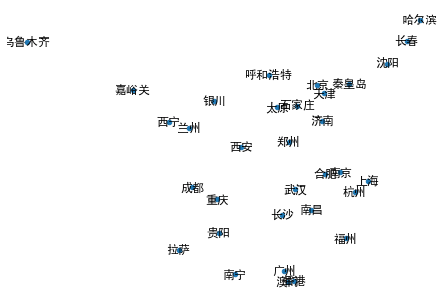

In [37]:
nx.draw(city_graph, city_dict, with_labels=True, node_size=20)
plt.show()

### 3.给定一个阈值，在范围内的构成一个网络

In [12]:
import math

In [13]:
# 计算两地之间的距离
def calculate_distance(address_start, address_end):
    dimension_start, longitude_start = city_dict[address_start]
    dimension_end, longitude_end = city_dict[address_end]
    radius = 6371  # km
    dimension_d = math.radians(dimension_end - dimension_start)
    longitude_d = math.radians(longitude_end - longitude_start)
    val_a = (math.sin(dimension_d / 2) * math.sin(dimension_d / 2) +
         math.cos(math.radians(dimension_start)) * math.cos(math.radians(dimension_end)) *
         math.sin(longitude_d / 2) * math.sin(longitude_d / 2))
    return radius * 2 * math.atan2(math.sqrt(val_a), math.sqrt(1 - val_a))

In [14]:
calculate_distance('沈阳', '天津')

703.1572567879595

In [15]:
threshold = 500 # 设置300km

In [16]:
# 构建数据城市之间直接可达的数据结构
connection_addr = {}
for start_city in city_dict.keys():
    next_city = []
    for end_city in city_dict.keys():
        city_distance = calculate_distance(start_city, end_city)
        if 0 < city_distance <= threshold:
#             print(city_distance, end_city)
            next_city.append(end_city)
    if next_city: connection_addr[start_city] = next_city
print(connection_addr)

{'兰州': ['西宁', '成都', '拉萨', '贵阳', '重庆', '银川'], '嘉峪关': ['西宁'], '西宁': ['兰州', '嘉峪关', '成都', '拉萨'], '成都': ['兰州', '西宁', '拉萨', '贵阳', '重庆', '银川'], '石家庄': ['武汉', '郑州', '济南', '合肥', '南昌', '长沙', '太原', '北京', '天津', '呼和浩特'], '拉萨': ['兰州', '西宁', '成都', '贵阳', '重庆'], '贵阳': ['兰州', '成都', '拉萨', '西安', '重庆', '南宁', '银川'], '武汉': ['石家庄', '郑州', '济南', '合肥', '南昌', '广州', '长沙', '太原', '香港', '澳门'], '郑州': ['石家庄', '武汉', '济南', '合肥', '南昌', '长沙', '太原', '北京', '天津', '呼和浩特'], '济南': ['石家庄', '武汉', '郑州', '南京', '合肥', '杭州', '南昌', '北京', '天津', '秦皇岛'], '南京': ['济南', '合肥', '杭州', '南昌', '福州', '北京', '上海', '天津', '秦皇岛'], '合肥': ['石家庄', '武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '北京', '上海', '天津'], '杭州': ['济南', '南京', '合肥', '南昌', '福州', '上海'], '南昌': ['石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '福州', '广州', '长沙', '香港', '澳门'], '福州': ['南京', '合肥', '杭州', '南昌', '上海'], '广州': ['武汉', '南昌', '长沙', '香港', '澳门'], '长沙': ['石家庄', '武汉', '郑州', '南昌', '广州', '太原', '香港', '澳门'], '沈阳': ['长春', '哈尔滨', '秦皇岛'], '长春': ['沈阳', '哈尔滨'], '哈尔滨': ['沈阳', '长春'], '太原': ['石家庄', '武汉', '郑州', '长

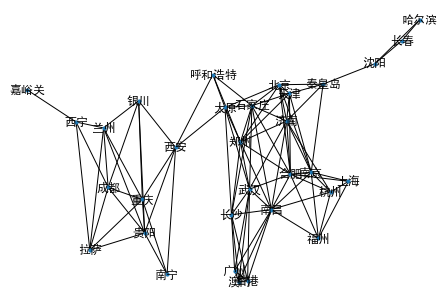

In [17]:
nx.draw(nx.Graph(connection_addr), city_dict, with_labels=True, node_size=10)

### 4.计算两个地点之间的导航路径

#### 4.1搜索从始发站到终点站路程最短的路线

In [18]:
from collections import defaultdict

In [19]:
# 测试获取一个不存在的key时，返回空list
t = {
    'a': '1',
    'b': '2',
    'c': '3',
}
new_t = defaultdict(list)
new_t.update(t)
print(new_t)
print(new_t['d'])

defaultdict(<class 'list'>, {'a': '1', 'b': '2', 'c': '3'})
[]


In [20]:
# 计算路线长度
def calculate_path_distance(path):
    distance = 0
    if len(path) < 2: return 0
    for i in range(1,len(path)):
        distance += calculate_distance(path[i], path[i-1])
#     print('path: {}，distance: {:.2f} km'.format(' 🚕 '.join(path),distance))
    return distance
        
# 根据距离最短排序      
def sorted_by_distance(paths):
    if len(paths) < 2: return paths
    # sorted 函数默认是升序
    return sorted(paths, key=calculate_path_distance)

In [21]:
# 搜索从某一地出发的所有路线(全局最短路程)
def search_start_to_end_city_path(start_city, end_city, connection_addr_dict):
    # 处理下面在获取不存在key时异常问题
    connection_addr = defaultdict(list)
    connection_addr.update(connection_addr_dict)
    # key表示为city，value表示以key结尾的最短路径
    short_paths_dict = {}
    short_paths = defaultdict(list)
    short_paths.update(short_paths_dict)
    # 存放待搜索路径，路径最后一个城市代表下一次即将搜索
    paths = [[start_city]]
    # 存放已经搜索过得城市
    visited_addr = set()
    while paths:
        # 取出一条路径，这里取得是最前面的一条
        path = paths.pop(0)
        # 取出路径的最后一个城市
        last_city = path[-1]
        # 查询城市下面链接的城市
        citys = connection_addr[last_city]
        for city in citys:
            # 如果城市已经被搜索过，继续循环
            if city in visited_addr: continue
            # 判断一下历史short_paths中是不是已经有了到达该city的path，已经有了需要进行比较，替换成最短的path
            if short_paths[city]:
                old = calculate_path_distance(short_paths[city])
                new = calculate_path_distance(path + [city])
                if new < old: short_paths[city] = path + [city]
            else:
                short_paths[city] = path + [city]
            # 把city追加到path后面生成新的一个path并插入到paths中
            paths.append(path + [city])
        # 把last_city添加到已搜索过得集合中
        visited_addr.add(last_city)
        # 按照距离排序
        paths = sorted_by_distance(paths)
#         print("排序后：{}".format(paths))
    return short_paths[end_city]

In [22]:
def print_path_info(path):
    path_str = ' > 🚕> '.join(path)
    print("path: {}".format(path_str))
    print("distance = {:.2f} km".format(calculate_path_distance(path)))

#### a.先来个简单的测试

In [23]:
simple_connection_addr = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原', '长沙', '福州'],
    '西安': ['太原', '兰州', '长沙'],
    '长沙': ['福州', '南宁', '郑州', '西安'],
    '沈阳': ['北京'],
    '南宁': ['长沙'],
    '福州': ['长沙', '上海', '郑州'],
    '上海': ['福州'],
}

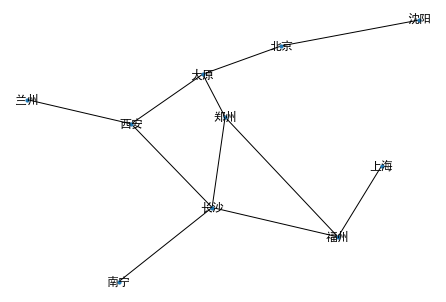

In [24]:
nx.draw(nx.Graph(simple_connection_addr), city_dict, with_labels=True, node_size=10)

In [27]:
path = search_start_to_end_city_path('沈阳', '南宁', simple_connection_addr)
print_path_info(path)

path: 沈阳 > 🚕> 北京 > 🚕> 太原 > 🚕> 郑州 > 🚕> 长沙 > 🚕> 南宁
distance = 2264.58 km


In [28]:
path = search_start_to_end_city_path('兰州', '福州', simple_connection_addr)
print_path_info(path)

path: 兰州 > 🚕> 西安 > 🚕> 长沙 > 🚕> 福州
distance = 1801.45 km


#### b.切换成中国地图进行测试

In [29]:
path = search_start_to_end_city_path('沈阳', '南宁', connection_addr)
print_path_info(path)

path: 沈阳 > 🚕> 秦皇岛 > 🚕> 天津 > 🚕> 石家庄 > 🚕> 太原 > 🚕> 西安 > 🚕> 南宁
distance = 2061.96 km


In [30]:
path = search_start_to_end_city_path('兰州', '福州', connection_addr)
print_path_info(path)

path: 兰州 > 🚕> 银川 > 🚕> 西安 > 🚕> 太原 > 🚕> 郑州 > 🚕> 南昌 > 🚕> 福州
distance = 2006.02 km


#### 4.2搜索始发城市到终点城市之间换成站较少的路线

In [31]:
# 搜索从某一地出发到另一地的一条换乘最少路线
def search_less_citys_path(start_city, end_city, connection_addr_dict):
    # 处理下面在获取不存在key时异常问题
    connection_addr = defaultdict(list)
    connection_addr.update(connection_addr_dict)
    paths = [[start_city]]
    visited_addr = set()
    while paths:
        path = paths.pop(0)
        last_city = path[-1]
        citys = connection_addr[last_city]
        for city in citys:
            if city in visited_addr: continue
            if city == end_city: return path + [city]
            paths.append(path + [city])
        visited_addr.add(last_city)
        paths = sorted(paths, key=len)
    return paths_result

#### a.简单测试

In [32]:
path = search_less_citys_path('太原', '兰州', simple_connection_addr)
print_path_info(path)

path: 太原 > 🚕> 西安 > 🚕> 兰州
distance = 1005.37 km


#### b.测试中国地图

In [33]:
path = search_less_citys_path('太原', '兰州', connection_addr)
print_path_info(path)

path: 太原 > 🚕> 西安 > 🚕> 贵阳 > 🚕> 兰州
distance = 1213.85 km


### 5.总结

    1、我设计的路程最短那个算法是全局最优算法，能找到全局最短路径，但是由于要存储可达所有城市的最短路径，还要计算每条路径的距离且进行排序，计算量较大，消耗内存也有点大，所以当地图网络较为复杂时，等待计算返回结果时间偏长。不知道有没有更好的优化方案？
    2、换成站较少的这个算法，计算量较小，能很快返回结果，返回的结果虽然满足了换乘站较少条件，但是结果并不一定是全局最优的，全局最优的是既满足换乘较少，又满足路程较短的路径。
    
    深度优先遍历(depth first) 
    优点：不全部保留结点，占用空间少                 缺点：有回溯操作(即有入栈、出栈操作)，运行速度慢
    广度优先遍历(breath first) 
    优点：无回溯操作(即无入栈、出栈操作)，运行速度快   缺点：保留全部结点，占用空间大

### 6.二者最优化算法：即获取换乘较少、路程较短的路径

In [34]:
# 搜索从某一地出发到另一地的一条路线
def search_best_path(start_city, end_city, connection_addr_dict):
    # 处理下面在获取不存在key时异常问题
    connection_addr = defaultdict(list)
    connection_addr.update(connection_addr_dict)
    # 存储可达end_city的所有path
    paths_result = []
    paths = [[start_city]]
    visited_addr = set()
    while paths:
        path = paths.pop(0)
        last_city = path[-1]
        citys = connection_addr[last_city]
        for city in citys:
            if city in visited_addr: continue
            if city == end_city: 
                paths_result.append(path + [city])
                continue
            paths.append(path + [city])
        visited_addr.add(last_city)
        paths = sorted(paths, key=len)
    return sorted_by_distance(paths_result)[0]

#### a.简单地图测试

In [35]:
path = search_best_path('太原', '兰州', simple_connection_addr)
print_path_info(path)

path: 太原 > 🚕> 西安 > 🚕> 兰州
distance = 1005.37 km


#### b.中国地图测试

In [36]:
path = search_best_path('太原', '兰州', connection_addr)
print_path_info(path)

path: 太原 > 🚕> 西安 > 🚕> 银川 > 🚕> 兰州
distance = 1042.98 km
